In [1]:
# import necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialise the model
        model = Sequential()
        inputShape = (height, width, depth)

        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        # first set CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # first and only set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the model
        return model

In [2]:
# import necessary packages
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from keras import backend as k
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# grab the MNIST dataset
print("[INFO] Accessing MNIST dataset ...")
dataset = datasets.fetch_openml("mnist_784")
data = dataset.data

[INFO] Accessing MNIST dataset ...


In [4]:
# if we are using "channel-first" ordering, then reshape the design matrix
if k.image_data_format() == "channels_first":
    data = data.reshape(data.shape[0], 1, 28, 28)
else:
    data = data.reshape(data.shape[0], 28, 28, 1)

In [5]:
# scale the input data in range [0, 1] and perform train test split
(trainX, testX, trainY, testY) = train_test_split(data / 255.0, dataset.target.astype("int"),
                                                  test_size=0.25, random_state=42)

In [6]:
le = LabelBinarizer()
trainY = le.fit_transform(trainY)
testY = le.fit_transform(testY)

In [7]:
# initialise the optimizer and model
print("[INFO] compiling model ...")
opt = SGD(lr=0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model ...


In [9]:
# train the network
print("[INFO] training the network ...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=128, epochs=20, verbose=1)

[INFO] training the network ...
Epoch 1/20
411/411 [==============================] - 95s 232ms/step - loss: 1.2860 - accuracy: 0.6694 - val_loss: 0.5641 - val_accuracy: 0.7927
Epoch 2/20
411/411 [==============================] - 92s 224ms/step - loss: 0.3399 - accuracy: 0.8982 - val_loss: 0.3932 - val_accuracy: 0.8759
Epoch 3/20
411/411 [==============================] - 91s 220ms/step - loss: 0.2501 - accuracy: 0.9249 - val_loss: 0.2349 - val_accuracy: 0.9301
Epoch 4/20
411/411 [==============================] - 91s 222ms/step - loss: 0.2017 - accuracy: 0.9403 - val_loss: 0.2025 - val_accuracy: 0.9397
Epoch 5/20
411/411 [==============================] - 90s 218ms/step - loss: 0.1704 - accuracy: 0.9494 - val_loss: 0.1847 - val_accuracy: 0.9451
Epoch 6/20
411/411 [==============================] - 92s 223ms/step - loss: 0.1500 - accuracy: 0.9560 - val_loss: 0.2038 - val_accuracy: 0.9391
Epoch 7/20
411/411 [==============================] - 92s 223ms/step - loss: 0.1325 - accuracy: 0.

In [9]:
from keras.utils import plot_model

# initialize LeNet and then write the network architecture
# visualisation graph to disk
model = LeNet.build(28, 28, 1, 10)
plot_model(model)

InvocationException: GraphViz's executables not found

In [12]:
# evaluate the network
print("[INOF] evaluating network ...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=[str(x) for x in le.classes_]))

[INOF] evaluating network ...
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1714
           1       0.98      0.99      0.99      1977
           2       0.98      0.98      0.98      1761
           3       0.98      0.96      0.97      1806
           4       0.98      0.97      0.98      1587
           5       1.00      0.89      0.94      1607
           6       0.97      0.99      0.98      1761
           7       0.98      0.97      0.98      1878
           8       0.94      0.97      0.96      1657
           9       0.95      0.96      0.96      1752

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



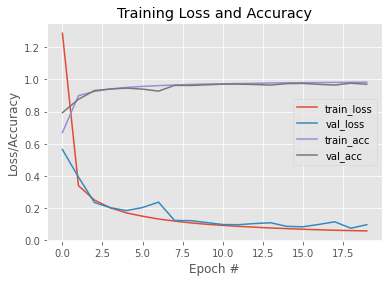

In [13]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()